## Objectives
In this demo, we use functionality to sample the distributions in 
Scolnic, Kessler Apj, 2016 through the class `SALT2_SK16` and a function
`sample_SALT2_SK16_hybrid`. After reading this, you should be able to obtain
samples from these distributions.

## last run : Oct 23 
## Last run by: Rahul Biswas

importts

In [37]:
import numpy as np

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [38]:
import snpop

In [4]:
print(snpop.__version__)

0.1.7dev8


In [5]:
from snpop import SALT2_SK16, sample_SALT2_SK16_hybrid

The main class dealing with the distribution function is `SALT2_SK16`. The distribution functions have 3 free parameters (sigma_minus, sigma_plus, mode) for each of the two parameters. There are two ways of instantiating
it.

First, one can supply the parameters directly to the class.

In [48]:
snls = SALT2_SK16(1.236, 0.283, 0.974, 0.044, 0.120, -0.065)

But it can also be done by using a model name (if implemented) using the `from_model_name`
method

In [49]:
sk16_all_c11 = SALT2_SK16.from_model_name('sk16_all_c11')

In [50]:
sk16_all_g10 = SALT2_SK16.from_model_name(model_name='SK16_all_g10')

To obtain samples from the class:
use the instance method `sample(number)` to get a numpy array `samps` of
shape (number, 2). The `samps` array is such that x1 values are `samps[:, 0]`
and ```c = samps[:, 1]```

In [25]:
x = sk16_all_c11.sample(100000)
y = sk16_all_g10.sample(100000)
z  = sample_SALT2_SK16_hybrid(100000, 'sk16_all_g10', 'sk16_all_c11')

Text(0.5, 0.98, 'all')

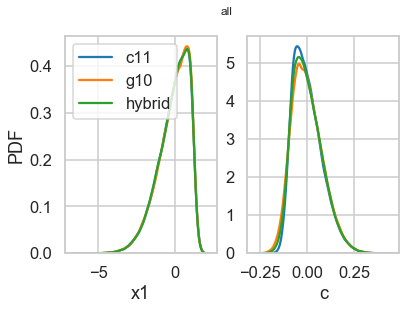

In [35]:
fig, ax = plt.subplots(1, 2)

sns.distplot(x[:, 0], ax=ax[0], hist=False, label='c11')
sns.distplot(y[:, 0], ax=ax[0], hist=False, label='g10')
sns.distplot(z[:, 0], ax=ax[0], hist=False, label='hybrid')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('PDF')
ax[1].set_xlabel('c')
sns.distplot(x[:, 1], ax=ax[1], hist=False)
sns.distplot(y[:, 1], ax=ax[1], hist=False)
sns.distplot(z[:, 1], ax=ax[1], hist=False)
ax[0].legend(loc='best')
fig.suptitle('all')

In [24]:
sk16_lowz_c11 = SALT2_SK16.from_model_name('sk16_lowz_c11')
sk16_lowz_g10 = SALT2_SK16.from_model_name(model_name='SK16_lowz_g10')

xl = sk16_lowz_c11.sample(100000)
yl = sk16_lowz_g10.sample(100000)
zl  = sample_SALT2_SK16_hybrid(100000, 'sk16_lowz_g10', 'sk16_lowz_c11')

Text(0.5, 0.98, 'low z')

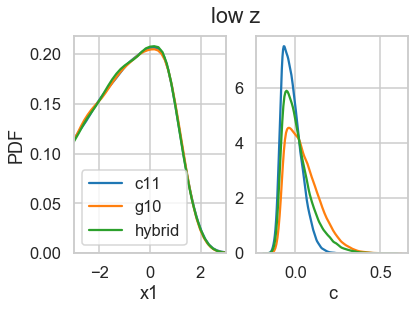

In [39]:
fig, ax = plt.subplots(1, 2)

sns.distplot(xl[:, 0], ax=ax[0], hist=False, label='c11')
sns.distplot(yl[:, 0], ax=ax[0], hist=False, label='g10')
sns.distplot(zl[:, 0], ax=ax[0], hist=False, label='hybrid')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('PDF')
ax[1].set_xlabel('c')
sns.distplot(xl[:, 1], ax=ax[1], hist=False)
sns.distplot(yl[:, 1], ax=ax[1], hist=False)
sns.distplot(zl[:, 1], ax=ax[1], hist=False)
ax[0].legend(loc='best')
ax[0].set_xlim(-3., 3.)
fig.suptitle('low z')

In [43]:
snls_samps.shape

(100000, 2)

Text(0.5, 0.98, 'lowz vs all')

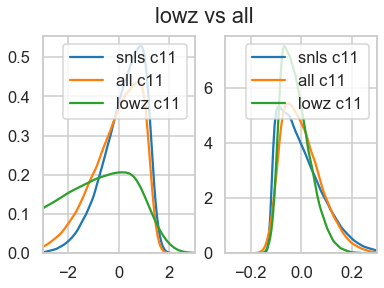

In [47]:
fig, ax = plt.subplots(1, 2)
sns.distplot(snls_samps[:, 1], ax=ax[1], hist=False, label='snls c11')
sns.distplot(snls_samps[:, 0], ax=ax[0], hist=False, label='snls c11')
sns.distplot(x[:, 0], ax=ax[0], hist=False, label='all c11')
sns.distplot(xl[:, 0], ax=ax[0], hist=False, label='lowz c11')
sns.distplot(x[:, 1], ax=ax[1], hist=False, label='all c11')
sns.distplot(xl[:, 1], ax=ax[1], hist=False, label='lowz c11')
ax[0].set_xlim(-3., 3.)
ax[1].set_xlim(-0.3, 0.3)
fig.suptitle('lowz vs all')